In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

C:\Users\uger7\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
boston = pd.read_csv('Boston.csv')

Variables  

There are 14 attributes in each case of the dataset. They are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil/teacher ratio by town
- black - proportion of blacks by town
- LSTAT - perc lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
boston.shape

(506, 14)

In [5]:
boston.drop(columns=['chas','nox','dis','rad','lstat'],inplace=True)

In [6]:
pop = pd.read_csv('population.csv')
boston['population'] = np.array(pop['population'].sample(len(boston)))
boston['population_orig'] = boston['population']
while boston['population'].min() < 100:
    boston['population'].loc[boston['population'] < 100] = boston['population'].loc[boston['population'] < 100]*np.random.uniform(low=1.1,high=1.5,size=len(boston['population'].loc[boston['population'] < 100]))
    
boston['population'] = round(boston['population'],0)

C:\Users\uger7\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
boston.head()

,crim,zn,indus,rm,age,tax,ptratio,black,medv,population,population_orig
0,0.00632,18.0,2.31,6.575,65.2,296,15.3,396.90,24.0,348.0,348
1,0.02731,0.0,7.07,6.421,78.9,242,17.8,396.90,21.6,1307.0,1307
2,0.02729,0.0,7.07,7.185,61.1,242,17.8,392.83,34.7,194.0,194
3,0.03237,0.0,2.18,6.998,45.8,222,18.7,394.63,33.4,238.0,238
4,0.06905,0.0,2.18,7.147,54.2,222,18.7,396.90,36.2,2627.0,2627


In [8]:
boston['families'] = boston['population']/3.92
families_ran_fact = np.random.uniform(low=.92,high=1.08,size=len(boston))
boston['families'] = boston['families'] * families_ran_fact
boston['families'] = round(boston['families'],0)

In [9]:
boston['median_home_value'] = boston['medv']*10000
boston['median_income'] = boston['median_home_value']/4.2
boston['median_income'].loc[boston['median_income'] <= 20000] = 20000
inc_rand_fact = np.random.normal(loc=1.05,scale=.23,size=len(boston))
boston['median_income'] = boston['median_income'] * inc_rand_fact
boston['median_income'] = round(boston['median_income'],0)

C:\Users\uger7\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


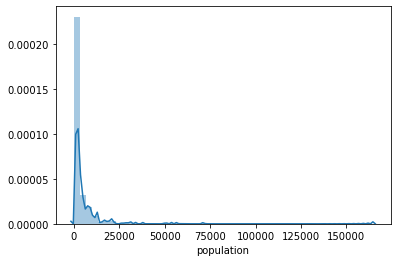

In [10]:
sns.distplot(boston['population'])

In [11]:
boston.head()

,crim,zn,indus,rm,age,tax,ptratio,black,medv,population,population_orig,families,median_home_value,median_income
0,0.00632,18.0,2.31,6.575,65.2,296,15.3,396.90,24.0,348.0,348,92.0,240000.0,65299.0
1,0.02731,0.0,7.07,6.421,78.9,242,17.8,396.90,21.6,1307.0,1307,336.0,216000.0,62614.0
2,0.02729,0.0,7.07,7.185,61.1,242,17.8,392.83,34.7,194.0,194,47.0,347000.0,61320.0
3,0.03237,0.0,2.18,6.998,45.8,222,18.7,394.63,33.4,238.0,238,62.0,334000.0,97919.0
4,0.06905,0.0,2.18,7.147,54.2,222,18.7,396.90,36.2,2627.0,2627,708.0,362000.0,106456.0


In [12]:
boston.corr()

,crim,zn,indus,rm,age,tax,ptratio,black,medv,population,population_orig,families,median_home_value,median_income
crim,1.000000,-0.200469,0.406583,-0.219247,0.352734,0.582764,0.289946,-0.385064,-0.388305,-0.034664,-0.034632,-0.034521,-0.388305,-0.317699
zn,-0.200469,1.000000,-0.533828,0.311991,-0.569537,-0.314563,-0.391679,0.175520,0.360445,0.051666,0.051689,0.051003,0.360445,0.329952
indus,0.406583,-0.533828,1.000000,-0.391676,0.644779,0.720760,0.383248,-0.356977,-0.483725,-0.083639,-0.083663,-0.083890,-0.483725,-0.422350
rm,-0.219247,0.311991,-0.391676,1.000000,-0.240265,-0.292048,-0.355501,0.128069,0.695360,0.053964,0.054023,0.052588,0.695360,0.649053
age,0.352734,-0.569537,0.644779,-0.240265,1.000000,0.506456,0.261515,-0.273534,-0.376955,-0.021891,-0.021895,-0.021104,-0.376955,-0.293783
tax,0.582764,-0.314563,0.720760,-0.292048,0.506456,1.000000,0.460853,-0.441808,-0.468536,-0.064349,-0.064369,-0.064334,-0.468536,-0.396494
ptratio,0.289946,-0.391679,0.383248,-0.355501,0.261515,0.460853,1.000000,-0.177383,-0.507787,-0.073906,-0.073960,-0.070490,-0.507787,-0.451533
black,-0.385064,0.175520,-0.356977,0.128069,-0.273534,-0.441808,-0.177383,1.000000,0.333461,0.019173,0.019123,0.019133,0.333461,0.290594
medv,-0.388305,0.360445,-0.483725,0.695360,-0.376955,-0.468536,-0.507787,0.333461,1.000000,0.031419,0.031488,0.029772,1.000000,0.883016
population,-0.034664,0.051666,-0.083639,0.053964,-0.021891,-0.064349,-0.073906,0.019173,0.031419,1.000000,0.999999,0.999296,0.031419,0.046989


In [13]:
os = SMOTE()

boston_2 = boston.copy()
cols = boston_2.columns.to_list()
boston_2.drop(columns=['medv','population_orig'],inplace=True)

while len(boston_2) < 25000:
    z = [0] * int(round(len(boston_2)*.75,0))
    o = [1] * (len(boston_2) - len(z))
    array = np.array(z+o)
    np.random.shuffle(array)
    boston_2, array = os.fit_sample(boston_2,array)
    
for col in boston_2.columns:
    boston_2[col] = boston_2[col] * np.random.normal(loc=1,scale=np.random.uniform(low=.01,high=.1,size=len(boston_2)))

for col in ['population','families','median_home_value','median_income']:
    boston_2[col] = round(boston_2[col].astype(np.int64),0)
    
boston_2.shape

(29202, 12)

In [14]:
boston_2.head()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income
0,0.006322,18.422513,2.392469,6.442588,71.953501,322.893625,16.172824,350.494345,339,93,244313,71105
1,0.025484,0.000000,6.365817,6.755689,75.064217,255.402213,19.050442,384.869856,1354,347,196362,61082
2,0.027205,0.000000,5.968918,7.531577,60.146760,240.813529,18.560537,387.000367,170,50,348958,61476
3,0.034227,0.000000,2.163872,7.086715,45.703592,230.656283,18.232063,394.559063,219,59,341245,81832
4,0.066767,0.000000,2.273031,7.586925,55.349723,217.782396,17.620741,376.060683,2415,724,365471,102577


In [15]:
boston_3 = boston_2.copy()

#pca = PCA(n_components=len(boston_3.columns))
#pca.fit(boston_3)
#boston_4 = pca.transform(boston_3)

random_factor = np.random.normal(loc=1,scale=0.05,size=len(boston_3))

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import normalize

boston_3['crim'] = np.log(boston_3['crim'])
boston_3['population'] = np.log(boston_3['population'])
boston_3['median_home_value_sq'] = boston_3['median_home_value']**2
boston_3['median_income'] = np.sqrt(boston_3['median_income'])

cols = boston_3.columns

scaler = StandardScaler()
scaler.fit(boston_3)
boston_3 = pd.DataFrame(scaler.transform(boston_3), columns = cols)
boston_3['random'] = random_factor

boston_3.head()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,median_home_value_sq,random
0,-2.558327,0.435149,-1.461512,0.190294,0.065837,-0.573992,-1.030927,-0.081544,-1.413646,-0.354084,0.180421,0.575513,-0.013826,0.958098
1,-1.823208,-0.652503,-0.791482,0.609178,0.204927,-1.052634,0.294226,0.386507,-0.064770,-0.226202,-0.334262,0.222530,-0.403811,0.969207
2,-1.788740,-0.652503,-0.858412,1.647205,-0.462079,-1.156096,0.068623,0.415515,-2.085935,-0.375734,1.303628,0.236930,1.131961,0.986661
3,-1.667661,-0.652503,-1.500061,1.052043,-1.107877,-1.228130,-0.082640,0.518433,-1.839235,-0.371202,1.220840,0.926691,1.033711,1.016656
4,-1.315305,-0.652503,-1.481654,1.721252,-0.676569,-1.319430,-0.364156,0.266563,0.498849,-0.036393,1.480870,1.545777,1.349690,1.060314


In [16]:
sample = boston_3.sample(1)

In [17]:
sample

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,median_home_value_sq,random
2051,0.859601,0.627112,0.147372,1.299827,0.549438,0.548578,-0.754353,0.092796,-0.857535,-0.327904,3.204381,3.072035,3.991693,1.037155


In [18]:
boston_3['sales'] = round(boston_3.apply(lambda x: 
             x[0] * - 50 +                 # crim
             x[1] * 10 +                   # zn
             x[2] * -20 +                  # indus
             x[3] * 0 +                   # rm
             x[4] * 80 +                   # age
             x[5] * -100  +                 # tax
             x[6] * 10 +                  # ptratio
             x[7] * 0 +                     # black
             x[8] * 1800 +                   # population
             x[9]*0 +                       # families
             x[10] * 100 +                 # median_home_value
             x[11] * -800 +                 # median_income
             x[12] * -3000 +                 # mhv^2
             42000,                   # intercept
            axis=1)*boston_3['random'],2)

In [19]:
boston_3['sales'].isnull().sum()

0

In [20]:
print('min',boston_3['sales'].min())
print('mean',boston_3['sales'].mean())
print('max',boston_3['sales'].max())
print('std',boston_3['sales'].std())

min 18503.21
mean 42035.88466851582
max 58175.68
std 4623.742651995415


In [21]:
lift = 28600
while boston_3['sales'].min() < lift:
    boston_3.loc[boston_3['sales'] < lift, 'sales'] += np.random.randint(low=800,high=10000,size=len(boston_3.loc[boston_3['sales'] < lift]))

In [22]:
print('min',boston_3['sales'].min())
print('mean',boston_3['sales'].mean())
print('max',boston_3['sales'].max())
print('std',boston_3['sales'].std())

min 28600.18
mean 42170.366279364425
max 58175.68
std 4260.003723894603


In [23]:
import statsmodels.api as sm

X = boston_3[[c for c in boston_3.columns if c not in ('sales','random')]]
y = boston_3['sales']

X['intercept'] = 1
lm = sm.OLS(y,X)
lr_results = lm.fit()
lr_results.summary()

C:\Users\uger7\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     6273.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:12:49   Log-Likelihood:            -2.6601e+05
No. Observations:               29202   AIC:                         5.320e+05
Df Residuals:                   29188   BIC:                         5.322e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
crim                    -8.7666     29.407     -0.298      0.766     -66.406      48.872
zn                      83.8613     18.765      4.469      0.000      47.081     120.642
indus                   50.7059     24.293      2.087      0.037       3.091      98.321
rm                     -68.4459     18.477     -3.704      0.000    -104.663     -32.229
age                     70.3900     20.057      3.510      0.000      31.078     109.702
tax                   -174.1799     28.341     -6.146      0.000    -229.730    -118.630
ptratio                 35.1282     16.455      2.135      0.033       2.876      67.381
black                   24.9399     16.523      1.509      0.131      -7.445      57.325
population            1767.5421     18.501     95.536      0.000    1731.279    1803.805
families                36.9132     18.364      2.010      0.044       0.919      72.908
median_home_value    -1287.3107     89.385    -14.402      0.000   -1462.509   -1112.112
median_income         -686.4193     30.151    -22.766      0.000    -745.517    -627.322
median_home_value_sq -1200.3973     75.532    -15.893      0.000   -1348.443   -1052.352
intercept             4.217e+04     12.801   3294.290      0.000    4.21e+04    4.22e+04
==============================================================================
Omnibus:                      111.372   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.298
Skew:                           0.135   Prob(JB):                     9.19e-26
Kurtosis:                       3.146   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

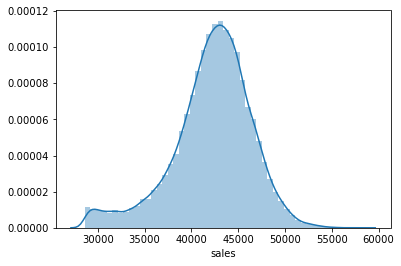

In [24]:
sns.distplot(boston_3['sales'])

In [25]:
boston_2['sales'] = boston_3['sales']
boston_2.corr()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,sales
crim,1.000000,-0.265144,0.470086,-0.244867,0.408462,0.639990,0.294238,-0.515359,-0.067120,-0.066759,-0.405655,-0.346752,0.203358
zn,-0.265144,1.000000,-0.579242,0.360667,-0.584679,-0.389846,-0.436067,0.276057,-0.025127,-0.026031,0.461386,0.446458,-0.345815
indus,0.470086,-0.579242,1.000000,-0.437603,0.679639,0.750130,0.422627,-0.453791,-0.087225,-0.086671,-0.555271,-0.496117,0.322063
rm,-0.244867,0.360667,-0.437603,1.000000,-0.253770,-0.357524,-0.367698,0.221638,0.081051,0.080750,0.685380,0.662821,-0.493146
age,0.408462,-0.584679,0.679639,-0.253770,1.000000,0.558362,0.280654,-0.386609,-0.005804,-0.004950,-0.402768,-0.347367,0.243539
tax,0.639990,-0.389846,0.750130,-0.357524,0.558362,1.000000,0.438699,-0.548985,-0.078359,-0.078241,-0.520947,-0.442763,0.290203
ptratio,0.294238,-0.436067,0.422627,-0.367698,0.280654,0.438699,1.000000,-0.255426,0.084523,0.087306,-0.538111,-0.474298,0.412746
black,-0.515359,0.276057,-0.453791,0.221638,-0.386609,-0.548985,-0.255426,1.000000,0.053723,0.054056,0.413247,0.372247,-0.250350
population,-0.067120,-0.025127,-0.087225,0.081051,-0.005804,-0.078359,0.084523,0.053723,1.000000,0.995365,-0.030056,0.009245,0.320946
families,-0.066759,-0.026031,-0.086671,0.080750,-0.004950,-0.078241,0.087306,0.054056,0.995365,1.000000,-0.030856,0.008409,0.319032


In [26]:
boston_2['county_id'] = range(100,len(boston_2)+100)

In [33]:
boston_final = boston_2.sample(frac=1).reset_index(drop=True)
existing = boston_final.loc[:7431,:]
new = boston_final.loc[7432:,:].drop(columns='sales')

In [34]:
existing.shape

(7432, 14)

In [35]:
new.shape

(21770, 13)

In [36]:
new.to_csv('new.csv',index=False)
existing.to_csv('existing.csv',index=False)